In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [52]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import numpy as np
print(tf.__version__)

2.3.1


In [41]:
base_dir = '/kaggle/input/skin-cancer-malignant-vs-benign'
train_dir = base_dir + '/train'
test_dir = base_dir +'/test'

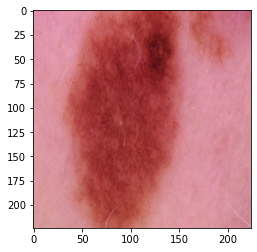

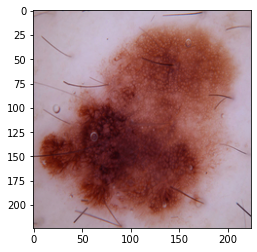

In [83]:
%matplotlib inline
image = mpimg.imread(test_dir+'/benign/1003.jpg')
plt.imshow(image)
plt.show()

image2 = mpimg.imread(test_dir+'/malignant/1007.jpg')
plt.imshow(image2)
plt.show()

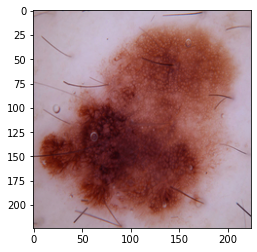

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array

train_gen = ImageDataGenerator(rescale=1/255, rotation_range=30, shear_range=0.2, zoom_range=0.3, height_shift_range=0.4)
test_gen = ImageDataGenerator(rescale=1/255)

train_dataset = train_gen.flow_from_directory(train_dir, target_size=(150,150),class_mode='binary', batch_size=64)
test_dataset = test_gen.flow_from_directory(test_dir, target_size=(150,150),class_mode='binary', batch_size=64)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [56]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = tf.keras.Sequential([
    Conv2D(64,(3,3), input_shape=(150,150,3), activation='relu', padding='SAME'),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3), activation='relu', padding='SAME'),
    MaxPooling2D((2,2)),
    Conv2D(16,(3,3), activation='relu', padding='SAME'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1,activation='sigmoid')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

In [58]:
#early_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='auto', patience=2)

history = model.fit(train_dataset, validation_data = test_dataset, epochs=30, verbose=2)

Epoch 1/30
42/42 - 52s - loss: 0.7892 - accuracy: 0.5552 - val_loss: 0.6099 - val_accuracy: 0.7197
Epoch 2/30
42/42 - 43s - loss: 0.5575 - accuracy: 0.7186 - val_loss: 0.5712 - val_accuracy: 0.7167
Epoch 3/30
42/42 - 43s - loss: 0.5170 - accuracy: 0.7493 - val_loss: 0.4180 - val_accuracy: 0.7939
Epoch 4/30
42/42 - 42s - loss: 0.5496 - accuracy: 0.6909 - val_loss: 0.4445 - val_accuracy: 0.7894
Epoch 5/30
42/42 - 42s - loss: 0.4600 - accuracy: 0.7751 - val_loss: 0.4318 - val_accuracy: 0.7818
Epoch 6/30
42/42 - 42s - loss: 0.4389 - accuracy: 0.7861 - val_loss: 0.4940 - val_accuracy: 0.7818
Epoch 7/30
42/42 - 42s - loss: 0.4314 - accuracy: 0.7895 - val_loss: 0.3993 - val_accuracy: 0.8030
Epoch 8/30
42/42 - 42s - loss: 0.4053 - accuracy: 0.8043 - val_loss: 0.3847 - val_accuracy: 0.7955
Epoch 9/30
42/42 - 42s - loss: 0.4366 - accuracy: 0.7801 - val_loss: 0.4329 - val_accuracy: 0.7818
Epoch 10/30
42/42 - 43s - loss: 0.4216 - accuracy: 0.8020 - val_loss: 0.3736 - val_accuracy: 0.7924
Epoch 11/

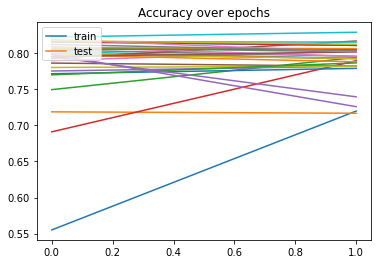

In [59]:
results = pd.DataFrame(history.history)

acc = results['accuracy']
val_acc = results['val_accuracy']
loss = results['loss']
val_loss = results['val_loss']
epochs=range(len(acc))

plt.plot([acc,val_acc])
plt.legend(['train', 'test'], loc='upper left')
plt.title("Accuracy over epochs")
plt.show()

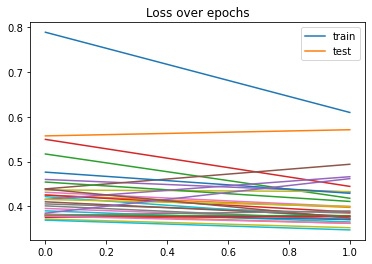

In [60]:
plt.plot([loss,val_loss])
plt.legend(['train', 'test'], loc='upper right')
plt.title("Loss over epochs")
plt.show()

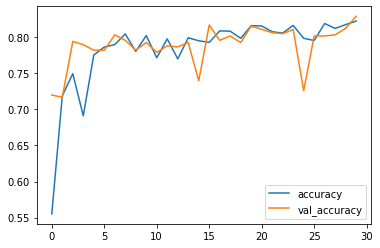

In [61]:
results.plot(y=['accuracy','val_accuracy'])


In [80]:
def predict()

ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:196 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 1]


In [90]:
def predict(image):
    np_image = img_to_array(image)
    np_image = np.expand_dims(np_image, axis=0)
    return model.predict(np_image)

In [94]:
for i in model.predict(test_dataset):
    print(i)

[0.35149717]
[0.00340608]
[0.00468627]
[0.8352107]
[0.9040948]
[0.8804775]
[0.70270944]
[0.95463395]
[0.00058174]
[0.67854226]
[0.6596605]
[0.12037775]
[0.87578356]
[0.7895882]
[0.04437715]
[0.59212613]
[0.83208305]
[0.9169569]
[0.32831264]
[0.5178593]
[0.5913966]
[0.00455371]
[0.595958]
[0.63938975]
[0.89055634]
[0.9990927]
[0.00287324]
[0.6784917]
[0.6015964]
[0.8960564]
[0.00098246]
[0.7141101]
[0.8948604]
[0.7547567]
[0.71862197]
[0.004666]
[0.5546074]
[0.00417283]
[0.44385803]
[0.09484145]
[0.9977324]
[0.00354639]
[0.9738791]
[0.00143382]
[0.4916831]
[0.5599707]
[0.76720876]
[0.00495186]
[0.5032329]
[0.0032413]
[0.00032642]
[0.9671712]
[0.9756355]
[0.9972258]
[0.8685047]
[0.01031554]
[0.56117517]
[0.6762043]
[0.9472196]
[0.00176087]
[0.9832901]
[0.00339833]
[0.89758426]
[0.7279374]
[0.6969301]
[0.77515495]
[0.8759438]
[0.27735764]
[0.00121856]
[0.47986832]
[0.7095717]
[0.6866892]
[0.34215537]
[0.00070313]
[0.98621136]
[0.5259745]
[0.58570343]
[0.0008319]
[0.01122987]
[0.93582714]


In [1]:
print([0.00340608], [0.9040948])


[0.00340608] [0.9040948]
